## Activity 02

In this activity you will continue practicing with the ideas of inference, simulations, posteriors and Bayesian best practices. 

Today, you will work with galaxies. More specifically, with a particular class of objects, called [Green Peas](https://en.wikipedia.org/wiki/Pea_galaxy). Green Peas are small galaxies (1 to 10\% the mass of the Milky Way), but are forming stars at a much faster rate compared to our own galaxy. It is not clear why Green Peas are forming stars at such a fast pace. One possibility is that the formation of new stars is triggered by interactions with nearby companions.

To test this hypotesis, Laufman et al. (2022) used new and archival data to search for companions around a sample of 23 Green Pea galaxies, and around a sample of 43 normal galaxies, matched in stellar mass and distance to the sample of Green Peas (but with normal star-formation rates). The data were obtained with the [MUSE spectrograph](https://www.eso.org/sci/facilities/develop/instruments/muse.html) on the [Very large Telescope](https://www.eso.org/sci/facilities/paranal.html) in Chile. 

The results of the analysis are collected in the file Laufman_Table2.dat, which includes the following columns:

- Galaxy         : object identifier	
- has_companion  : a flag that identify whether or not the galaxy has a companion  (1= has a companion, 0 =does not have a companion)
- GP             : Is it a Green Pea or a Normal Galaxy ? 1=GP  2= Normal Galaxy

You will use the data to estimate the probability that a galaxy has a companion. You will make this estimate for both samples, the Green Peas and the normal galaxies.

**1**
Perform a visual inspection of the data, for both samples. What kind of data do you have? How do they differ from the data you had last week?

**2**
Build a statistical model as discussed in lecture. Clearly explain it. Including a motivation for the choice of the probability of observing the data, given the uknown parameter, and the probability of the parameter.  Clearly explain how you compute the constants for the prior.

**3**
Write a code to compute the model. As usual, follow best practices when writing your code [you will share the code with us]. Make sure the code is well commented and can easily be read by humans. Check that the code's paths are not specific to your machine. For reproducibility, set the seed for the pseudo-random number generator explicitly. 

**4**
Plot the posterior distribution functions, and compute the position of the posterior's maximum and its 95\% credible interval. 

**5**
Perform and describe a sensitivity analysis (i.e., discuss how the choice of the prior influences the result).

**6** 
Using the analysis you performed above, would you be comfortable stating "The Green Pea galaxies are clearly different from the normal galaxy population"? Why yes or why not?


In [1]:
import numpy as np

In [3]:
data_table = np.loadtxt('Laufman_Table2.dat', delimiter=' ')

ValueError: could not convert string to float: 'J094458.22-004545.4'

In [10]:
galaxy = []
has_comp = []
gp = []
with open('Laufman_Table2.dat', 'r') as f:
    header = f.readline()
    lines = f.readlines()
    for line in lines:
        gp.append(float(line.split()[2][0]))
        has_comp.append(int(line.split()[1]))
        galaxy.append(line.split()[0])
    
print(galaxy)
print(has_comp)
print(gp)
    

['J094458.22-004545.4', 'J130211.15-000516.4', 'J232539.23+004507.2', 'J032244.89+004442.3', 'J012910.15+145934.6', 'J030321.41-075923.2', 'J032613.62-063512.5', 'J033947.79-072541.2', 'J105716.72+023207.0', 'J124423.37+021540.4', 'J084216.95+033806.6', 'J154709.10+033614.0', 'J223735.05+133647.0', 'J144231.37-020952.0', 'J103138.93+071556.5', 'J124834.63+123402.9', 'J160436.66+081959.1', 'J155925.97+084119.1', 'J101157.08+130822.0', 'J163719.30+143904.9', 'J092532.36+140313.1', 'J161306.31+092949.1', 'J080518.06+092533.3', 'NORMAL-1', 'NORMAL-2', 'NORMAL-3', 'NORMAL-4', 'NORMAL-5', 'NORMAL-6', 'NORMAL-7', 'NORMAL-8', 'NORMAL-9', 'NORMAL-10', 'NORMAL-11', 'NORMAL-12', 'NORMAL-13', 'NORMAL-14', 'NORMAL-15', 'NORMAL-16', 'NORMAL-17', 'NORMAL-18', 'NORMAL-19', 'NORMAL-20', 'NORMAL-21', 'NORMAL-22', 'NORMAL-23', 'NORMAL-24', 'NORMAL-25', 'NORMAL-26', 'NORMAL-27', 'NORMAL-28', 'NORMAL-29', 'NORMAL-30', 'NORMAL-31', 'NORMAL-32', 'NORMAL-33', 'NORMAL-34', 'NORMAL-35', 'NORMAL-36', 'NORMAL-37'

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame({'Galaxy': galaxy, 'Has Companion': has_comp, 'GP': gp})

In [16]:
df

,Galaxy,Has Companion,GP
0,J094458.22-004545.4,1,0.0
1,J130211.15-000516.4,0,0.0
2,J232539.23+004507.2,0,0.0
3,J032244.89+004442.3,0,0.0
4,J012910.15+145934.6,0,0.0
...,...,...,...
61,NORMAL-39,0,2.0
62,NORMAL-40,0,2.0
63,NORMAL-41,0,2.0
64,NORMAL-42,0,2.0


In [15]:
import matplotlib.pyplot as plt


What I got from looking at the data is that 4 out of 23 green peas have companion. None of the normal galaxies do.

The difference from last week is that the variable we were studying last week was a continuous variable. This time we are dealing with a binary variable.

<AxesSubplot:>

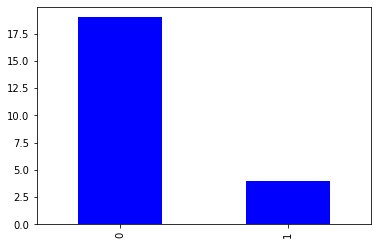

In [20]:
df.loc[df['GP'] == 0, 'Has Companion'].value_counts().plot(kind='bar', color='blue', label='GP = 0')

So above is the distribution of companions for greeen peas.

In [22]:
gp_comp = df.loc[df['GP'] == 0, 'Has Companion'].value_counts()

In [23]:
#this is the summary of data for green peas
gp_comp

0    19
1     4
Name: Has Companion, dtype: int64

In [24]:
normal_comp = df.loc[df['GP'] == 2, 'Has Companion'].value_counts()

In [26]:
#this is the summary of data for normal
normal_comp


0    43
Name: Has Companion, dtype: int64

#Question 2

To find the statistical model that reprents the data we can either use a likelihood distribution or a posterior, I am gonna do both since I don't have a good prior in mind

likelihood estimate :
\begin{equation}
X | \theta \sim Binomial(n, \theta) \\
\theta \sim Beta(a, b)
\end{equation}
I do not know a and b, so I just choose $a = 1, b = 1$.
But I will also try for a setting like : $a = 1, b = 4 $( assuming that some of the green peas have companion)

\begin{equation}
\theta | X \sim Beta(a + x, n + b - x)\\
\theta | X \sim Beta(5, 20)\\


\end{equation}
or for the second choice of posterior 

\begin{equation}

\theta | X \sim Beta(5, 24)\\


\end{equation}
So our estimate of $\theta$ is the mean of these two distributions we found

$\hat{\theta} = \frac{a}{a + b}$

In [27]:
#to simulate this we first set the seed

In [28]:
np.random.seed(42)

In [30]:
expected_theta1 = 5 / (20 + 5)
#this is the expected theta for the first prior choice
print(f'expected_theta for the first prior choice is {expected_theta1}')

expected_theta for the first prior choice is 0.2


In [32]:
expected_theta2 = 5 /(24 + 5)
#this is the expected theta for the second prior choice
print(f'expected theta for the second choice of prior is {expected_theta2}')

expected theta for the second choice of prior is 0.1724137931034483


In [33]:
#to show the beta distribution we use the beta function

In [39]:
from scipy.stats import beta
#

#
x = np.linspace(0, 1, 500)
#


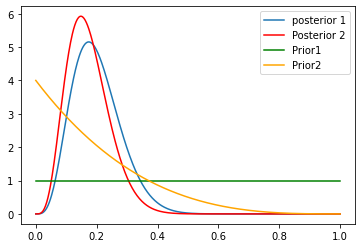

In [45]:
plt.plot(x, beta.pdf(x, 5, 20))
plt.plot(x, beta.pdf(x, 5, 24), color='red')
plt.plot(x, beta.pdf(x, 1, 1), color='green')
plt.plot(x, beta.pdf(x, 1, 4), color='orange')
plt.legend(['posterior 1', 'Posterior 2', 'Prior1', 'Prior2'])
#this is the plot of the posteriors and priors

#Question 4

interval for the first posterior is (0.071318617198055, 0.37384171348868267)


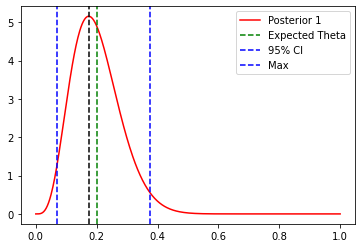

In [52]:
interval_ = beta.interval(0.95, 5, 20)
print(f'interval for the first posterior is {interval_}')
plt.plot(x, beta.pdf(x, 5, 20), color='red')
plt.axvline(expected_theta1, color='green', linestyle='--')
plt.axvline(interval_[0], color='blue', linestyle='--')
plt.axvline(interval_[1], color='blue', linestyle='--')
max_ = np.argmax(beta.pdf(x, 5, 20))
pos_max = x[max_]
plt.axvline(pos_max, color='black', linestyle='--')
plt.legend(['Posterior 1', 'Expected Theta', '95% CI', 'Max'])

The position of the maximum is on 


In [53]:
pos_max

0.17434869739478956